In [9]:
# 1. Importar bibliotecas
import numpy as np
import pandas as pd
import requests

# 2. Definir a URL do JSON
url = 'https://raw.githubusercontent.com/YuriArduino/Estudos_Artificial_Intelligence/refs/heads/Dados/dados_vendas.json'

# 3. Fazer a requisição dos dados
response = requests.get(url)
data = response.json()

# 4. Normalizar o JSON em formato tabular (expande 'item' e 'loja')
df = pd.json_normalize(data)

# 5. Visualização inicial do DataFrame
print("\n>>> Primeiras linhas do DataFrame:")
print(df.head())

# 6. Estrutura do DataFrame
print("\n>>> Estrutura do DataFrame (info):")
print(df.info())

# 7. Estatísticas descritivas (apenas numéricas)
print("\n>>> Estatísticas descritivas:")
print(df.describe())

# 8. Verificar duplicatas e valores nulos
print("\n>>> Total de duplicatas:", df.duplicated().sum())
print("\n>>> Valores nulos por coluna:")
print(df.isnull().sum())



>>> Primeiras linhas do DataFrame:
  item_identificador loja_identificador  vendas_totais  item.item_peso  \
0              FDB08             OUT018      176503.58           6.055   
1              DRQ35             OUT049      185758.20           9.300   
2              FDD14             OUT018      165983.94          20.700   
3              FDY37             OUT045      314923.40          17.000   
4              FDY59             OUT018       64782.34           8.195   

  item.item_conteudo_gordura  item.item_visibilidade      item.item_tipo  \
0      Baixo Teor de Gordura                0.031230   Frutas e Vegetais   
1      Baixo Teor de Gordura                0.042357  Bebidas Alcoólicas   
2      Baixo Teor de Gordura                0.170500           Enlatados   
3                    Regular                0.026623           Enlatados   
4      Baixo Teor de Gordura                0.000000         Confeitaria   

   item.item_preco item.item_quantidade_venda  loja.loja_ano_e

In [10]:
# Remove linhas 100% duplicadas
df = df.drop_duplicates()

In [12]:
df = df.drop_duplicates(subset=["item_identificador", "loja_identificador"], keep="first")

In [13]:
print("Antes:", 8550)
print("Depois:", len(df))

Antes: 8550
Depois: 8523


In [14]:
df = df.drop(columns=["item.item_quantidade_venda"])

In [15]:
df["item.item_peso"] = df.groupby("item.item_tipo")["item.item_peso"].transform(lambda x: x.fillna(x.mean()))

In [16]:
df["item.item_peso"] = df["item.item_peso"].fillna(df["item.item_peso"].median())

In [17]:
df["loja.loja_tamanho"] = df.groupby("loja.loja_tipo")["loja.loja_tamanho"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Médio"))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 8549
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   item_identificador             8523 non-null   object 
 1   loja_identificador             8523 non-null   object 
 2   vendas_totais                  8523 non-null   float64
 3   item.item_peso                 8523 non-null   float64
 4   item.item_conteudo_gordura     8523 non-null   object 
 5   item.item_visibilidade         8523 non-null   float64
 6   item.item_tipo                 8523 non-null   object 
 7   item.item_preco                8523 non-null   float64
 8   loja.loja_ano_estabelecimento  8523 non-null   int64  
 9   loja.loja_tamanho              8523 non-null   object 
 10  loja.loja_tipo_localizacao     8523 non-null   object 
 11  loja.loja_tipo                 8523 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 865.

In [19]:
# Mapeamento para padronização
mapa_gordura = {
    "Baixo Teor de Gordura": "Baixo Teor de Gordura",
    "BTG": "Baixo Teor de Gordura",
    "baixo teor de gordura": "Baixo Teor de Gordura",
    "Regular": "Regular",
    "reg": "Regular"
}

# Aplicar o mapeamento
df["item.item_conteudo_gordura"] = df["item.item_conteudo_gordura"].replace(mapa_gordura)

# Conferir resultado
print(df["item.item_conteudo_gordura"].value_counts())

item.item_conteudo_gordura
Baixo Teor de Gordura    5517
Regular                  3006
Name: count, dtype: int64


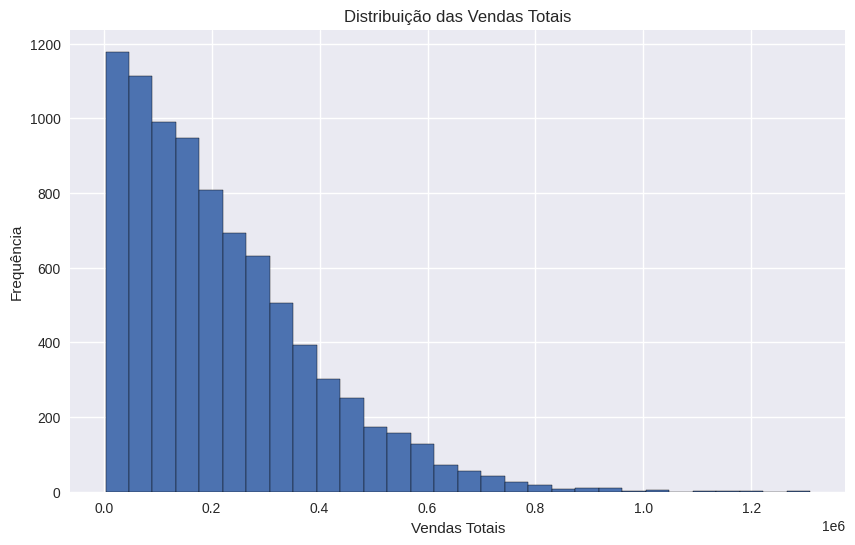

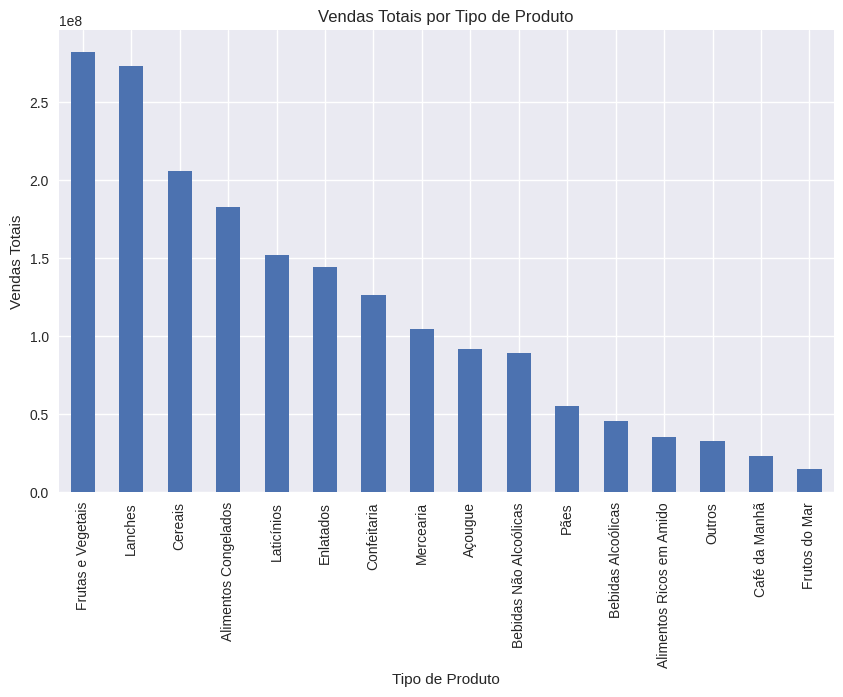

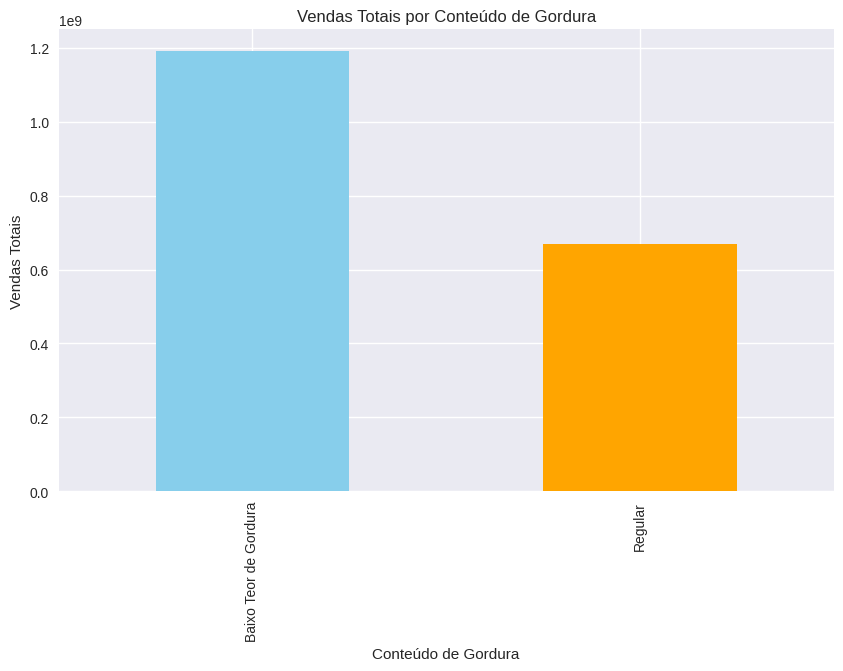

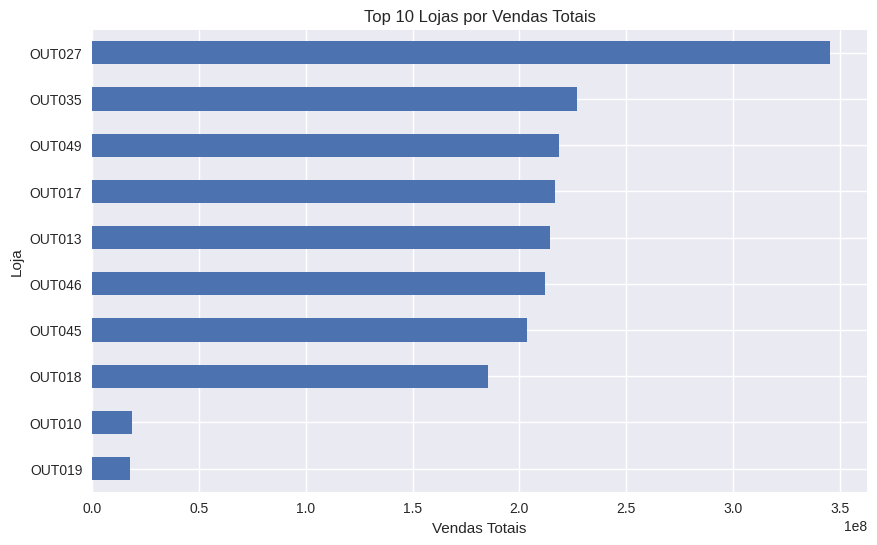

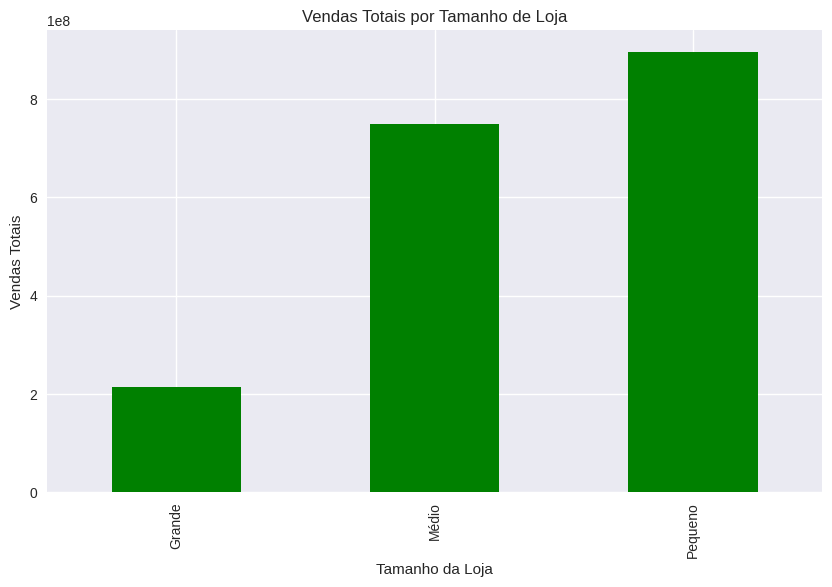

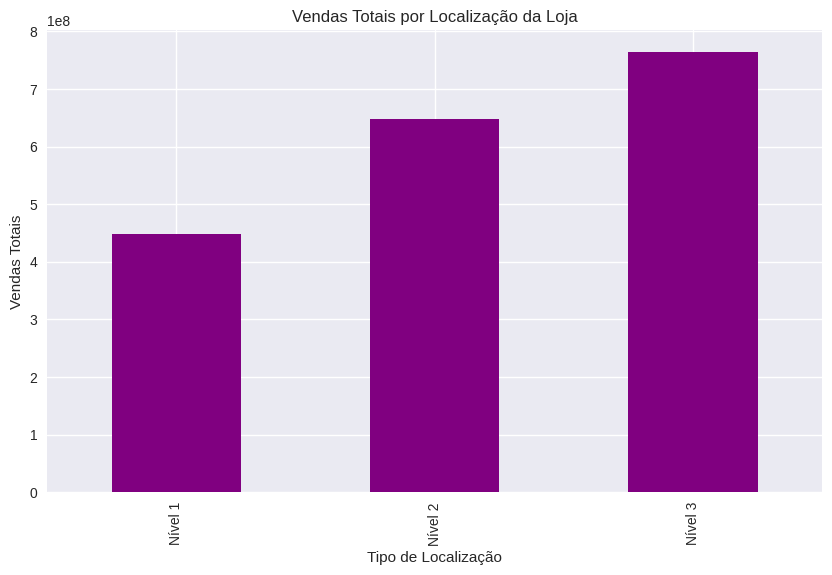

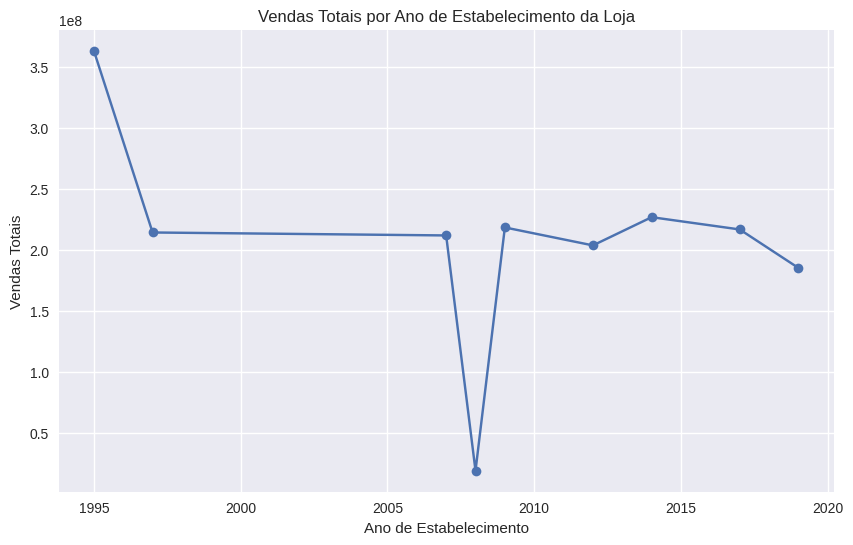

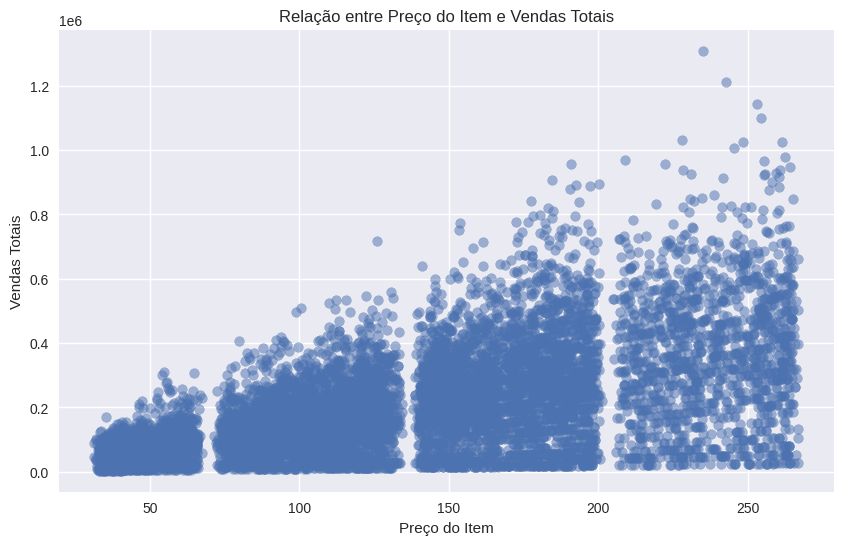

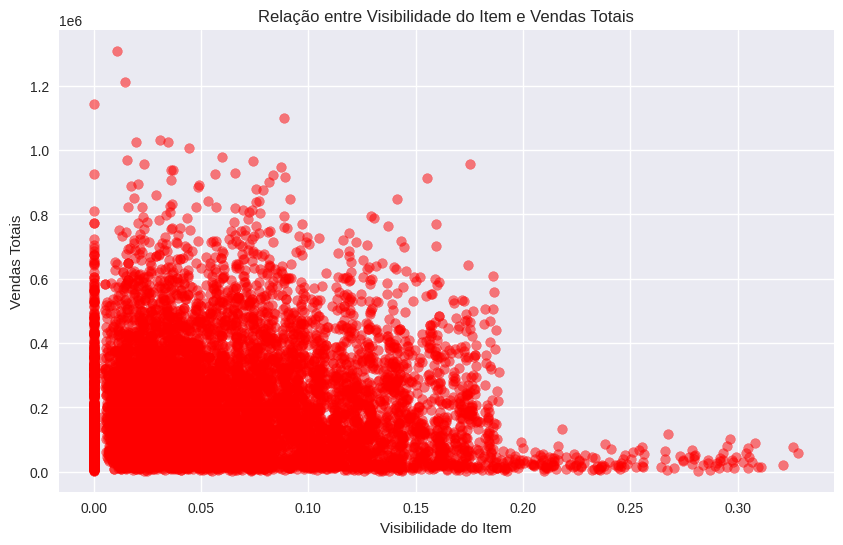

In [20]:
# 1. Importar bibliotecas
import matplotlib.pyplot as plt
import pandas as pd

# Configuração de estilo
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

# =============================
# 2. Distribuição geral de vendas
# =============================
plt.hist(df["vendas_totais"], bins=30, edgecolor="black")
plt.title("Distribuição das Vendas Totais")
plt.xlabel("Vendas Totais")
plt.ylabel("Frequência")
plt.show()

# =============================
# 3. Vendas por tipo de produto
# =============================
df.groupby("item.item_tipo")["vendas_totais"].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Vendas Totais por Tipo de Produto")
plt.xlabel("Tipo de Produto")
plt.ylabel("Vendas Totais")
plt.xticks(rotation=90)
plt.show()

# =============================
# 4. Vendas por conteúdo de gordura
# =============================
df.groupby("item.item_conteudo_gordura")["vendas_totais"].sum().plot(kind="bar", color=["skyblue", "orange"])
plt.title("Vendas Totais por Conteúdo de Gordura")
plt.xlabel("Conteúdo de Gordura")
plt.ylabel("Vendas Totais")
plt.show()

# =============================
# 5. Top 10 lojas em vendas
# =============================
df.groupby("loja_identificador")["vendas_totais"].sum().sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Top 10 Lojas por Vendas Totais")
plt.xlabel("Vendas Totais")
plt.ylabel("Loja")
plt.gca().invert_yaxis()
plt.show()

# =============================
# 6. Vendas por tamanho de loja
# =============================
df.groupby("loja.loja_tamanho")["vendas_totais"].sum().plot(kind="bar", color="green")
plt.title("Vendas Totais por Tamanho de Loja")
plt.xlabel("Tamanho da Loja")
plt.ylabel("Vendas Totais")
plt.show()

# =============================
# 7. Vendas por tipo de localização
# =============================
df.groupby("loja.loja_tipo_localizacao")["vendas_totais"].sum().plot(kind="bar", color="purple")
plt.title("Vendas Totais por Localização da Loja")
plt.xlabel("Tipo de Localização")
plt.ylabel("Vendas Totais")
plt.show()

# =============================
# 8. Vendas por ano de estabelecimento
# =============================
df.groupby("loja.loja_ano_estabelecimento")["vendas_totais"].sum().plot(kind="line", marker="o")
plt.title("Vendas Totais por Ano de Estabelecimento da Loja")
plt.xlabel("Ano de Estabelecimento")
plt.ylabel("Vendas Totais")
plt.show()

# =============================
# 9. Relação Preço x Vendas (Scatter)
# =============================
plt.scatter(df["item.item_preco"], df["vendas_totais"], alpha=0.5)
plt.title("Relação entre Preço do Item e Vendas Totais")
plt.xlabel("Preço do Item")
plt.ylabel("Vendas Totais")
plt.show()

# =============================
# 10. Relação Visibilidade x Vendas (Scatter)
# =============================
plt.scatter(df["item.item_visibilidade"], df["vendas_totais"], alpha=0.5, color="red")
plt.title("Relação entre Visibilidade do Item e Vendas Totais")
plt.xlabel("Visibilidade do Item")
plt.ylabel("Vendas Totais")
plt.show()


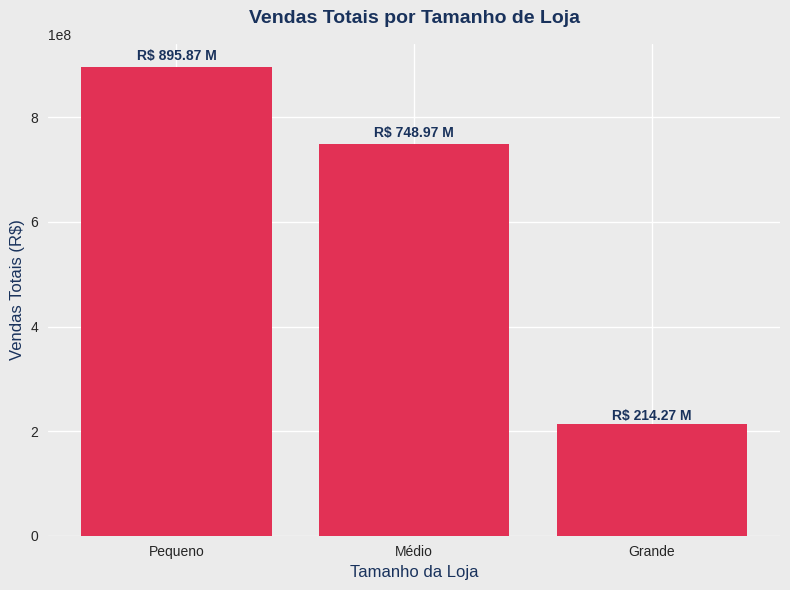

In [26]:
import matplotlib.pyplot as plt

# 1. Agrupando os dados
vendas_por_tamanho = df.groupby("loja.loja_tamanho")["vendas_totais"].sum().sort_values(ascending=False)

# 2. Criando a figura e eixos com fundo personalizado
fig, ax = plt.subplots(figsize=(8, 6), facecolor="#ebebeb")
ax.set_facecolor("#ebebeb")

# 3. Plotando o gráfico de barras
bars = ax.bar(vendas_por_tamanho.index, vendas_por_tamanho.values, color="#e23155")

# 4. Adicionando rótulos com os valores em milhões acima das barras
for bar in bars:
    altura = bar.get_height()
    valor_milhoes = altura / 1e6  # converte para milhões
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        altura + (0.01 * altura),  # posição um pouco acima da barra
        f"R$ {valor_milhoes:.2f} M",
        ha="center", va="bottom",
        color="#19325c", fontsize=10, fontweight="bold"
    )

# 5. Ajustando título e eixos
ax.set_title("Vendas Totais por Tamanho de Loja", fontsize=14, color="#19325c", pad=15, fontweight="bold")
ax.set_xlabel("Tamanho da Loja", fontsize=12, color="#19325c")
ax.set_ylabel("Vendas Totais (R$)", fontsize=12, color="#19325c")

# 6. Ajustando layout
plt.tight_layout()
plt.show()


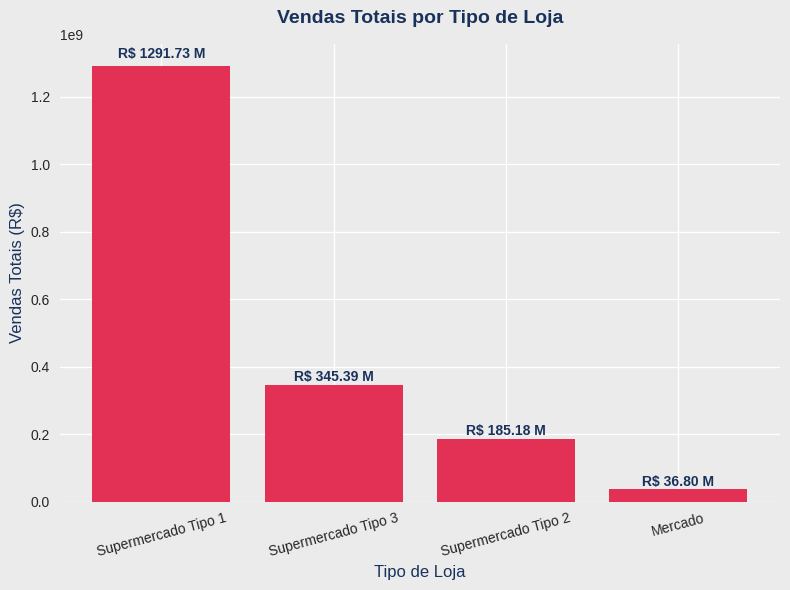

In [22]:
import matplotlib.pyplot as plt

# 1. Agrupar os dados por tipo de loja
vendas_por_tipo = df.groupby("loja.loja_tipo")["vendas_totais"].sum().sort_values(ascending=False)

# 2. Criar a figura com fundo personalizado
fig, ax = plt.subplots(figsize=(8, 6), facecolor="#ebebeb")
ax.set_facecolor("#ebebeb")

# 3. Plotar gráfico de barras
bars = ax.bar(vendas_por_tipo.index, vendas_por_tipo.values, color="#e23155")

# 4. Adicionar rótulos com valores em milhões
for bar in bars:
    altura = bar.get_height()
    valor_milhoes = altura / 1e6  # converte para milhões
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        altura + (0.01 * altura),  # posição acima da barra
        f"R$ {valor_milhoes:.2f} M",
        ha="center", va="bottom",
        color="#19325c", fontsize=10, fontweight="bold"
    )

# 5. Ajustes visuais
ax.set_title("Vendas Totais por Tipo de Loja", fontsize=14, color="#19325c", pad=15, fontweight="bold")
ax.set_xlabel("Tipo de Loja", fontsize=12, color="#19325c")
ax.set_ylabel("Vendas Totais (R$)", fontsize=12, color="#19325c")
plt.xticks(rotation=15)  # melhora legibilidade das categorias

# 6. Ajuste de layout e exibir
plt.tight_layout()
plt.show()


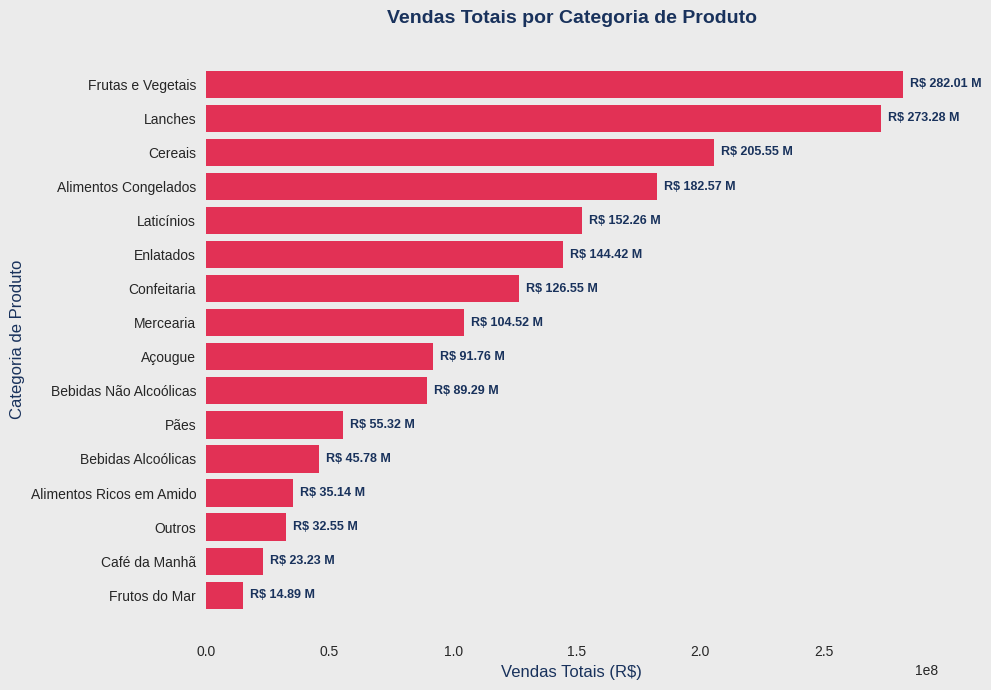

In [23]:
import matplotlib.pyplot as plt

# 1. Agrupar os dados por categoria de produto
vendas_por_item = (
    df.groupby("item.item_tipo")["vendas_totais"]
    .sum()
    .sort_values(ascending=True)  # ordena para efeito funil
)

# 2. Criar a figura
fig, ax = plt.subplots(figsize=(10, 7), facecolor="#ebebeb")
ax.set_facecolor("#ebebeb")

# 3. Plotar gráfico de barras horizontais
bars = ax.barh(vendas_por_item.index, vendas_por_item.values, color="#e23155")

# 4. Adicionar rótulos de valores em milhões ao lado das barras
for bar in bars:
    largura = bar.get_width()
    valor_milhoes = largura / 1e6  # converte para milhões
    ax.text(
        largura + (0.01 * vendas_por_item.values.max()),  # um pouco à frente da barra
        bar.get_y() + bar.get_height() / 2,
        f"R$ {valor_milhoes:.2f} M",
        va="center", ha="left",
        color="#19325c", fontsize=9, fontweight="bold"
    )

# 5. Ajustes visuais
ax.set_title("Vendas Totais por Categoria de Produto", fontsize=14, color="#19325c", pad=15, fontweight="bold")
ax.set_xlabel("Vendas Totais (R$)", fontsize=12, color="#19325c")
ax.set_ylabel("Categoria de Produto", fontsize=12, color="#19325c")

# Remover grid
ax.grid(False)

# Layout e exibir
plt.tight_layout()
plt.show()


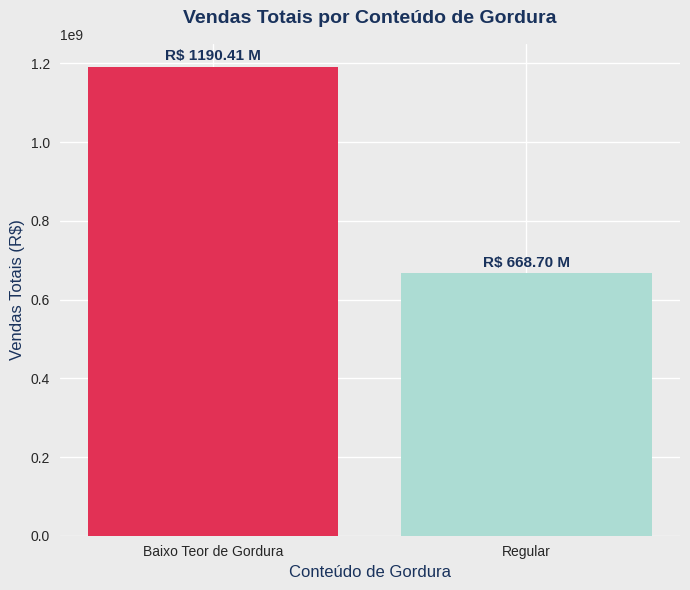

In [24]:
import matplotlib.pyplot as plt

# 1. Agrupar os dados por conteúdo de gordura
vendas_por_gordura = (
    df.groupby("item.item_conteudo_gordura")["vendas_totais"]
    .sum()
    .reindex(["Baixo Teor de Gordura", "Regular"])  # garante ordem fixa
)

# 2. Definir cores específicas para cada categoria
cores = {
    "Baixo Teor de Gordura": "#e23155",
    "Regular": "#acdcd3"
}
bar_colors = [cores[c] for c in vendas_por_gordura.index]

# 3. Criar a figura
fig, ax = plt.subplots(figsize=(7, 6), facecolor="#ebebeb")
ax.set_facecolor("#ebebeb")

# 4. Plotar gráfico de colunas
bars = ax.bar(vendas_por_gordura.index, vendas_por_gordura.values, color=bar_colors)

# 5. Adicionar rótulos com valores em milhões
for bar in bars:
    altura = bar.get_height()
    valor_milhoes = altura / 1e6  # converte para milhões
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        altura + (0.01 * altura),  # um pouco acima da coluna
        f"R$ {valor_milhoes:.2f} M",
        ha="center", va="bottom",
        color="#19325c", fontsize=11, fontweight="bold"
    )

# 6. Ajustes visuais
ax.set_title("Vendas Totais por Conteúdo de Gordura", fontsize=14, color="#19325c", pad=15, fontweight="bold")
ax.set_xlabel("Conteúdo de Gordura", fontsize=12, color="#19325c")
ax.set_ylabel("Vendas Totais (R$)", fontsize=12, color="#19325c")

plt.tight_layout()
plt.show()


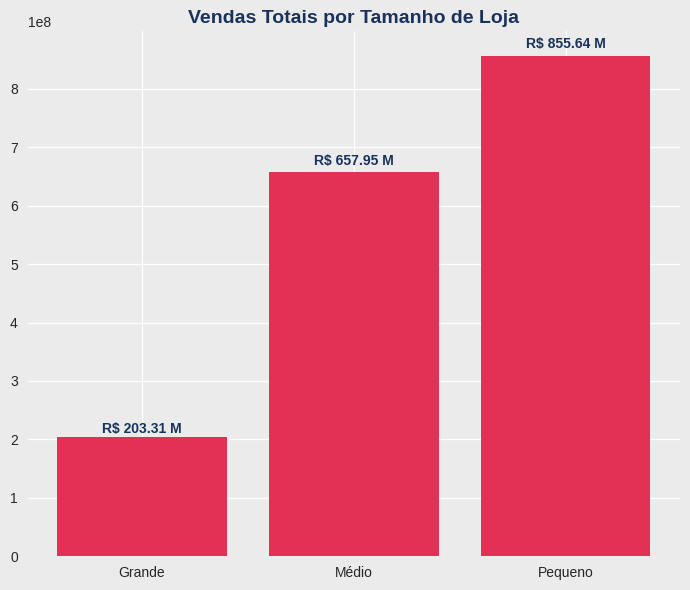

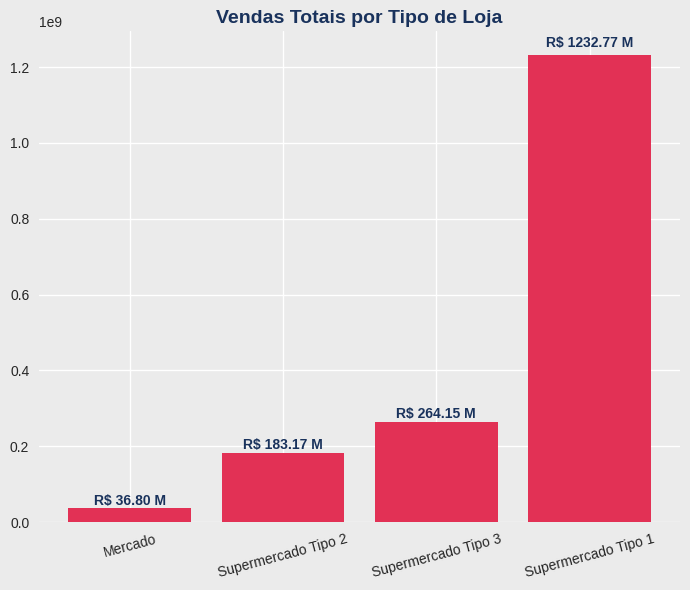

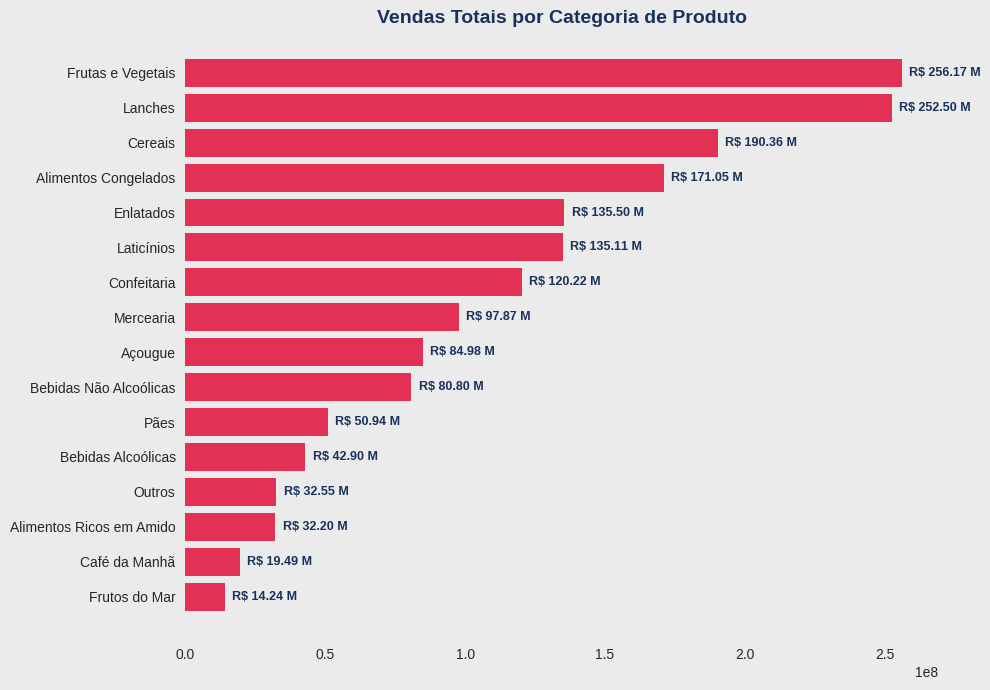

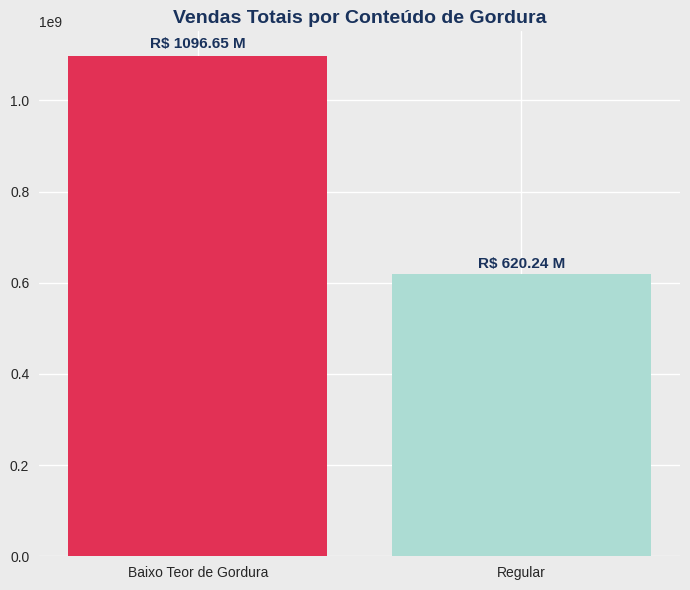

Shape final do DataFrame: (8337, 12)
  item_identificador loja_identificador  vendas_totais  item.item_peso  \
0              FDB08             OUT018      176503.58           6.055   
1              DRQ35             OUT049      185758.20           9.300   
2              FDD14             OUT018      165983.94          20.700   
3              FDY37             OUT045      314923.40          17.000   
4              FDY59             OUT018       64782.34           8.195   

  item.item_conteudo_gordura  item.item_visibilidade      item.item_tipo  \
0      Baixo Teor de Gordura                0.031230   Frutas e Vegetais   
1      Baixo Teor de Gordura                0.042357  Bebidas Alcoólicas   
2      Baixo Teor de Gordura                0.170500           Enlatados   
3                    Regular                0.026623           Enlatados   
4      Baixo Teor de Gordura                0.000000         Confeitaria   

   item.item_preco  loja.loja_ano_estabelecimento loja.loja_t

In [28]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from pydantic import BaseModel, Field, field_validator


# ===== CONFIGURAÇÃO DO LOADER =====
class DataLoaderConfig(BaseModel):
    url: str = Field(..., description="URL do arquivo JSON")

    @field_validator("url")
    @classmethod
    def validar_url(cls, v: str) -> str:
        if not (v.startswith("http://") or v.startswith("https://")):
            raise ValueError("URL deve começar com http:// ou https://")
        return v


# ===== FUNÇÃO DE CARREGAMENTO =====
def load_data(config: DataLoaderConfig) -> pd.DataFrame:
    response = requests.get(config.url)
    response.raise_for_status()
    data = response.json()

    if isinstance(data, list):
        df = pd.json_normalize(data)
    elif isinstance(data, dict):
        df = pd.json_normalize([data])
    else:
        df = pd.DataFrame([data])

    return df


# ===== FUNÇÃO DE LIMPEZA =====
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    if "item.item_quantidade_venda" in df.columns:
        df.drop(columns=["item.item_quantidade_venda"], inplace=True)

    df["item.item_conteudo_gordura"] = df["item.item_conteudo_gordura"].replace({
        "reg": "Regular",
        "BTG": "Baixo Teor de Gordura",
        "baixo teor de gordura": "Baixo Teor de Gordura"
    })

    return df


# ===== TRATAMENTO DE NULOS =====
def handle_nulls(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df.drop_duplicates(inplace=True)

    if "item.item_peso" in df.columns:
        df["item.item_peso"] = df.groupby("item.item_tipo")["item.item_peso"].transform(
            lambda x: x.fillna(x.median())
        )

    if "loja.loja_tamanho" in df.columns:
        df["loja.loja_tamanho"] = df.groupby("loja.loja_tipo")["loja.loja_tamanho"].transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Não registrado")
        )

    df.reset_index(drop=True, inplace=True)
    return df


# ===== TRATAMENTO DE OUTLIERS =====
def treat_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    df = df.copy()

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df = df[(df[column] >= limite_inferior) & (df[column] <= limite_superior)].copy()
    df.reset_index(drop=True, inplace=True)
    return df


# ===== FUNÇÃO DE PLOTS =====
def generate_plots(df: pd.DataFrame):
    # Paleta de identidade
    fundo = "#ebebeb"
    cor_principal = "#e23155"
    cor_texto = "#19325c"

    # --- Vendas por Tamanho de Loja ---
    vendas_tamanho = df.groupby("loja.loja_tamanho")["vendas_totais"].sum().sort_values()
    fig, ax = plt.subplots(figsize=(7, 6), facecolor=fundo)
    ax.set_facecolor(fundo)
    bars = ax.bar(vendas_tamanho.index, vendas_tamanho.values, color=cor_principal)
    for bar in bars:
        altura = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, altura + altura*0.01,
                f"R$ {altura/1e6:.2f} M", ha="center", va="bottom",
                color=cor_texto, fontsize=10, fontweight="bold")
    ax.set_title("Vendas Totais por Tamanho de Loja", color=cor_texto, fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

    # --- Vendas por Tipo de Loja ---
    vendas_tipo = df.groupby("loja.loja_tipo")["vendas_totais"].sum().sort_values()
    fig, ax = plt.subplots(figsize=(7, 6), facecolor=fundo)
    ax.set_facecolor(fundo)
    bars = ax.bar(vendas_tipo.index, vendas_tipo.values, color=cor_principal)
    for bar in bars:
        altura = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, altura + altura*0.01,
                f"R$ {altura/1e6:.2f} M", ha="center", va="bottom",
                color=cor_texto, fontsize=10, fontweight="bold")
    ax.set_title("Vendas Totais por Tipo de Loja", color=cor_texto, fontsize=14, fontweight="bold")
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

    # --- Vendas por Categoria de Produto ---
    vendas_item = df.groupby("item.item_tipo")["vendas_totais"].sum().sort_values()
    fig, ax = plt.subplots(figsize=(10, 7), facecolor=fundo)
    ax.set_facecolor(fundo)
    bars = ax.barh(vendas_item.index, vendas_item.values, color=cor_principal)
    for bar in bars:
        largura = bar.get_width()
        ax.text(largura + vendas_item.values.max()*0.01,
                bar.get_y() + bar.get_height()/2,
                f"R$ {largura/1e6:.2f} M",
                va="center", ha="left", color=cor_texto,
                fontsize=9, fontweight="bold")
    ax.set_title("Vendas Totais por Categoria de Produto", color=cor_texto, fontsize=14, fontweight="bold")
    ax.grid(False)
    plt.tight_layout()
    plt.show()

    # --- Vendas por Conteúdo de Gordura ---
    vendas_gordura = df.groupby("item.item_conteudo_gordura")["vendas_totais"].sum()
    cores = {"Baixo Teor de Gordura": cor_principal, "Regular": "#acdcd3"}
    fig, ax = plt.subplots(figsize=(7, 6), facecolor=fundo)
    ax.set_facecolor(fundo)
    bars = ax.bar(vendas_gordura.index, vendas_gordura.values,
                  color=[cores[c] for c in vendas_gordura.index])
    for bar in bars:
        altura = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, altura + altura*0.01,
                f"R$ {altura/1e6:.2f} M", ha="center", va="bottom",
                color=cor_texto, fontsize=11, fontweight="bold")
    ax.set_title("Vendas Totais por Conteúdo de Gordura", color=cor_texto, fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()


# ===== PIPELINE COMPLETO =====
def process_pipeline(config: DataLoaderConfig) -> pd.DataFrame:
    df = load_data(config)
    df = clean_data(df)
    df = handle_nulls(df)
    df = treat_outliers(df, "vendas_totais")
    generate_plots(df)
    return df


# ===== EXECUÇÃO =====
config_vendas = DataLoaderConfig(
    url="https://raw.githubusercontent.com/YuriArduino/Estudos_Artificial_Intelligence/refs/heads/Dados/dados_vendas.json"
)

df_final = process_pipeline(config_vendas)

print(f"Shape final do DataFrame: {df_final.shape}")
print(df_final.head())


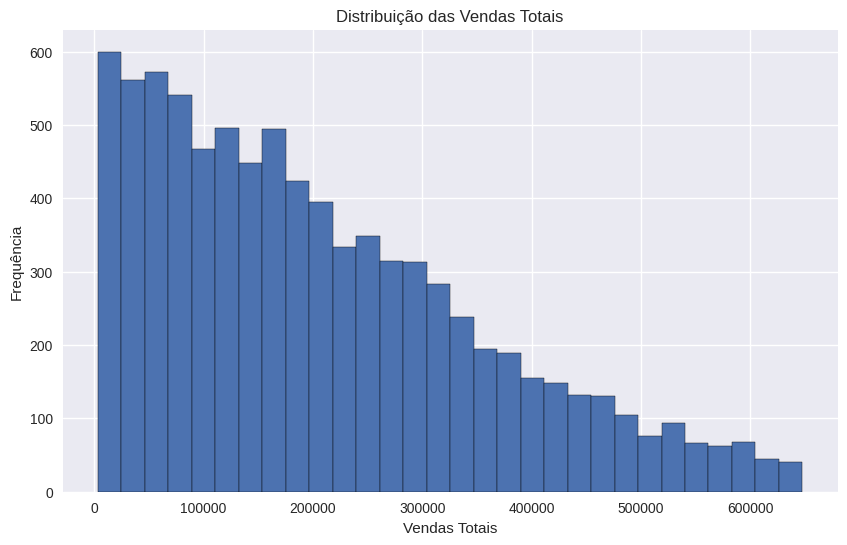

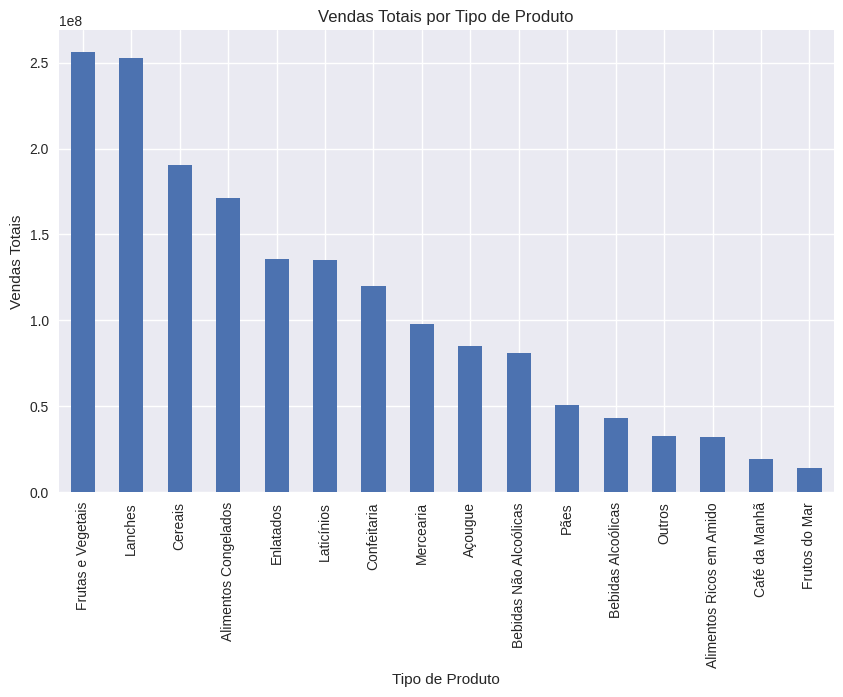

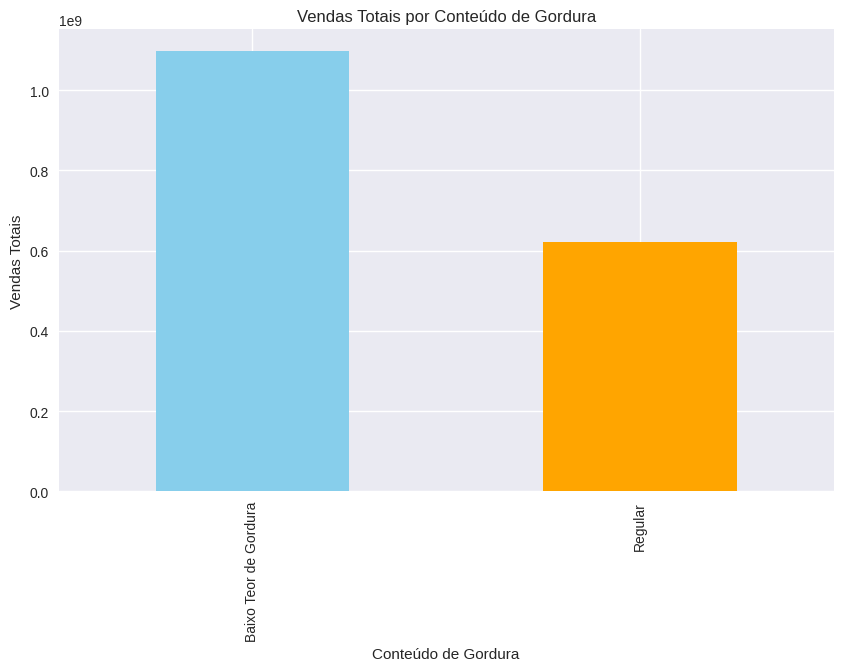

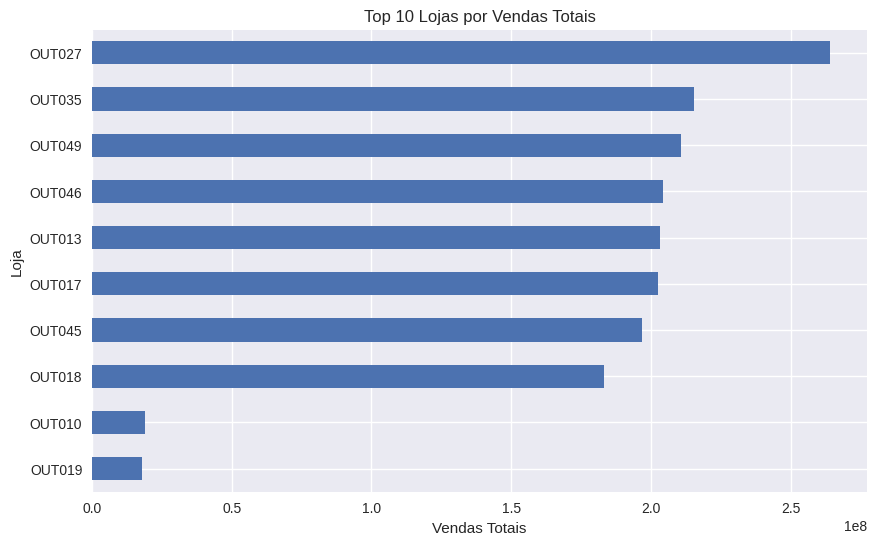

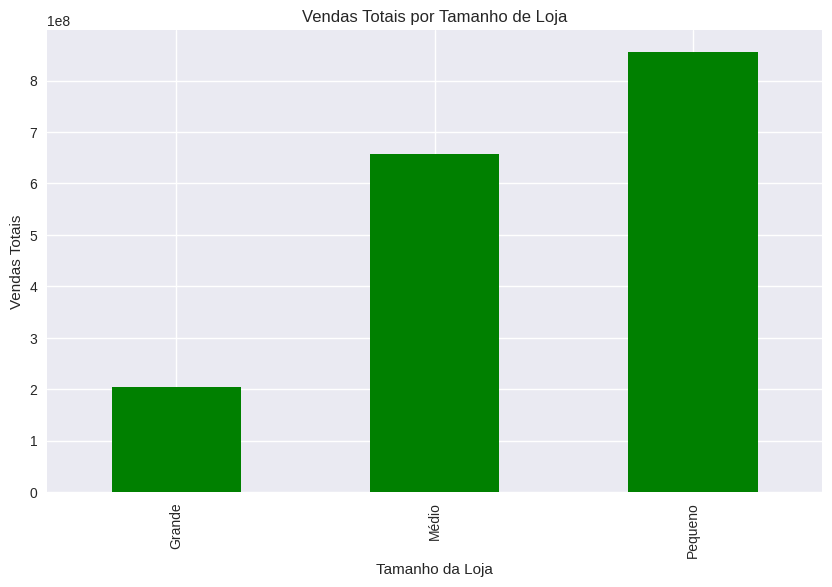

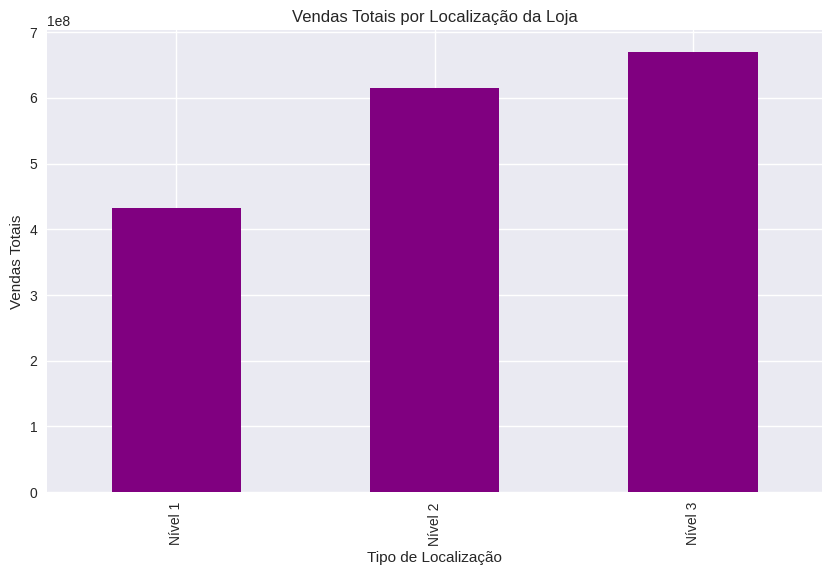

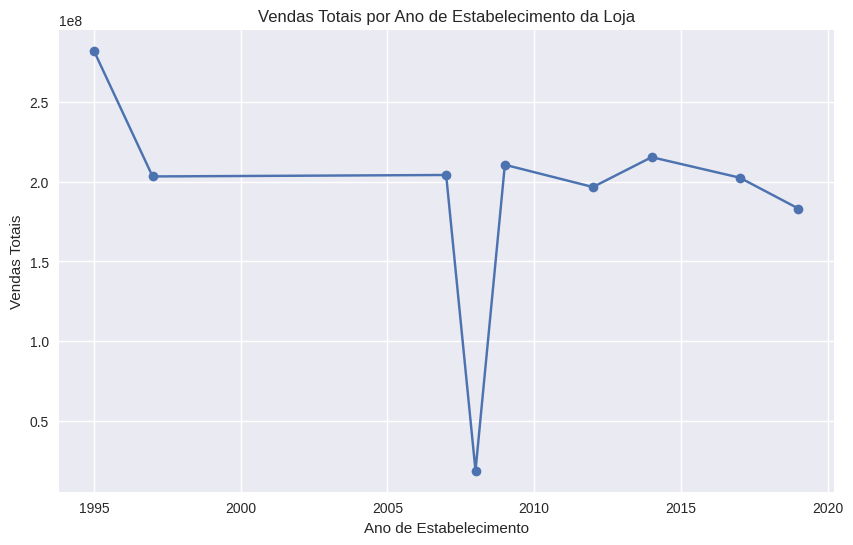

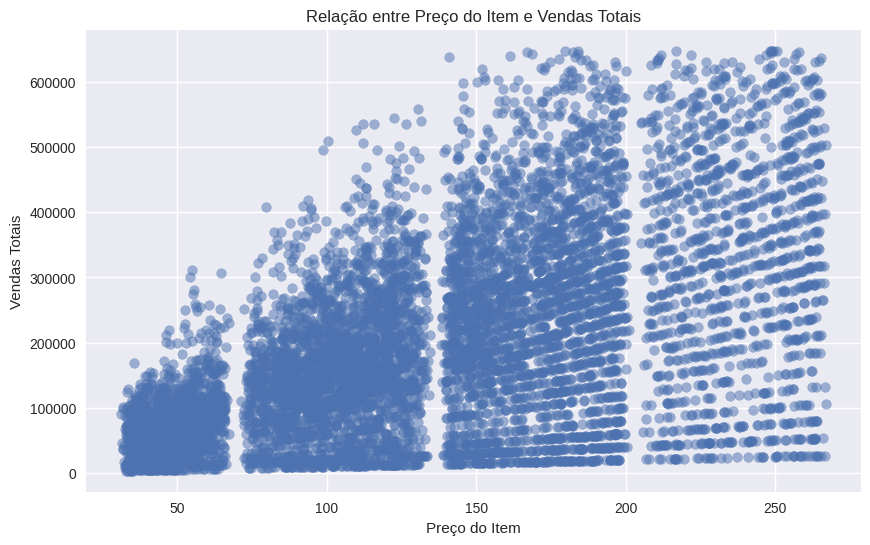

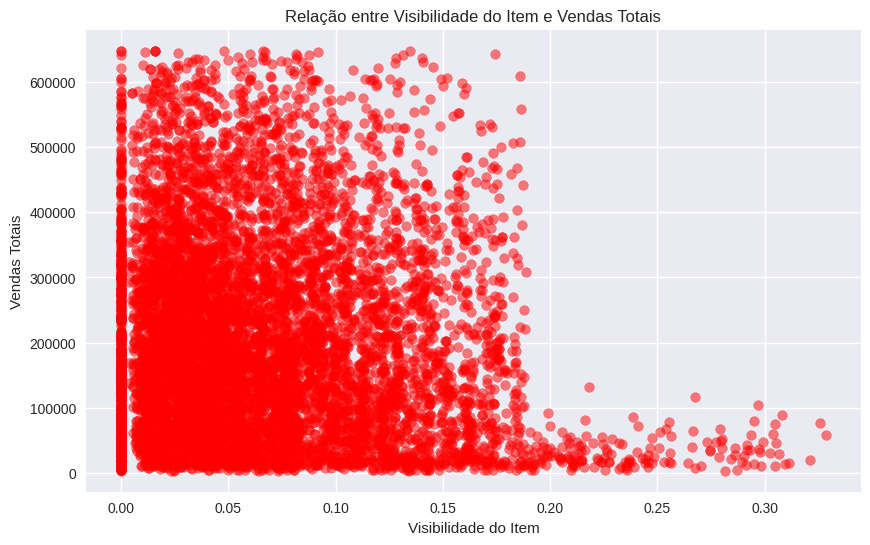

In [29]:
# 1. Importar bibliotecas
import matplotlib.pyplot as plt
import pandas as pd

# Configuração de estilo
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

# =============================
# 2. Distribuição geral de vendas
# =============================
plt.hist(df_final["vendas_totais"], bins=30, edgecolor="black")
plt.title("Distribuição das Vendas Totais")
plt.xlabel("Vendas Totais")
plt.ylabel("Frequência")
plt.show()

# =============================
# 3. Vendas por tipo de produto
# =============================
df_final.groupby("item.item_tipo")["vendas_totais"].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Vendas Totais por Tipo de Produto")
plt.xlabel("Tipo de Produto")
plt.ylabel("Vendas Totais")
plt.xticks(rotation=90)
plt.show()

# =============================
# 4. Vendas por conteúdo de gordura
# =============================
df_final.groupby("item.item_conteudo_gordura")["vendas_totais"].sum().plot(kind="bar", color=["skyblue", "orange"])
plt.title("Vendas Totais por Conteúdo de Gordura")
plt.xlabel("Conteúdo de Gordura")
plt.ylabel("Vendas Totais")
plt.show()

# =============================
# 5. Top 10 lojas em vendas
# =============================
df_final.groupby("loja_identificador")["vendas_totais"].sum().sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Top 10 Lojas por Vendas Totais")
plt.xlabel("Vendas Totais")
plt.ylabel("Loja")
plt.gca().invert_yaxis()
plt.show()

# =============================
# 6. Vendas por tamanho de loja
# =============================
df_final.groupby("loja.loja_tamanho")["vendas_totais"].sum().plot(kind="bar", color="green")
plt.title("Vendas Totais por Tamanho de Loja")
plt.xlabel("Tamanho da Loja")
plt.ylabel("Vendas Totais")
plt.show()

# =============================
# 7. Vendas por tipo de localização
# =============================
df_final.groupby("loja.loja_tipo_localizacao")["vendas_totais"].sum().plot(kind="bar", color="purple")
plt.title("Vendas Totais por Localização da Loja")
plt.xlabel("Tipo de Localização")
plt.ylabel("Vendas Totais")
plt.show()

# =============================
# 8. Vendas por ano de estabelecimento
# =============================
df_final.groupby("loja.loja_ano_estabelecimento")["vendas_totais"].sum().plot(kind="line", marker="o")
plt.title("Vendas Totais por Ano de Estabelecimento da Loja")
plt.xlabel("Ano de Estabelecimento")
plt.ylabel("Vendas Totais")
plt.show()

# =============================
# 9. Relação Preço x Vendas (Scatter)
# =============================
plt.scatter(df_final["item.item_preco"], df_final["vendas_totais"], alpha=0.5)
plt.title("Relação entre Preço do Item e Vendas Totais")
plt.xlabel("Preço do Item")
plt.ylabel("Vendas Totais")
plt.show()

# =============================
# 10. Relação Visibilidade x Vendas (Scatter)
# =============================
plt.scatter(df_final["item.item_visibilidade"], df_final["vendas_totais"], alpha=0.5, color="red")
plt.title("Relação entre Visibilidade do Item e Vendas Totais")
plt.xlabel("Visibilidade do Item")
plt.ylabel("Vendas Totais")
plt.show()


In [33]:
df_final.groupby("loja.loja_ano_estabelecimento")["vendas_totais"].sum()

,vendas_totais
loja.loja_ano_estabelecimento,
1995,2.821188e+08
1997,2.033081e+08
2007,2.042211e+08
2008,1.883402e+07
2009,2.106249e+08
2012,1.966751e+08
2014,2.153951e+08
2017,2.025425e+08
2019,1.831713e+08


                               vendas_totais  n_lojas  media_vendas_por_loja
loja.loja_ano_estabelecimento                                               
1995                            2.821188e+08        2           1.410594e+08
1997                            2.033081e+08        1           2.033081e+08
2007                            2.042211e+08        1           2.042211e+08
2008                            1.883402e+07        1           1.883402e+07
2009                            2.106249e+08        1           2.106249e+08
2012                            1.966751e+08        1           1.966751e+08
2014                            2.153951e+08        1           2.153951e+08
2017                            2.025425e+08        1           2.025425e+08
2019                            1.831713e+08        1           1.831713e+08


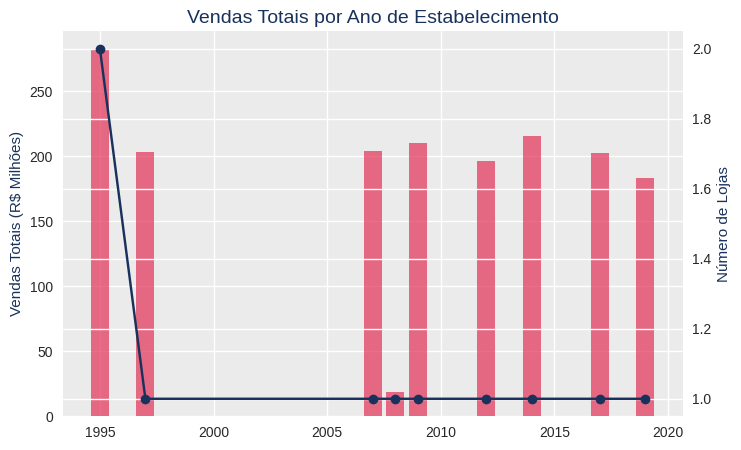

In [35]:
# 1. Total por ano
vendas_por_ano = df_final.groupby("loja.loja_ano_estabelecimento")["vendas_totais"].sum()

# 2. Quantidade de lojas por ano (corrigindo para loja_identificador)
lojas_por_ano = df_final.groupby("loja.loja_ano_estabelecimento")["loja_identificador"].nunique()

# 3. Juntar em um DataFrame para análise comparativa
df_ano = pd.DataFrame({
    "vendas_totais": vendas_por_ano,
    "n_lojas": lojas_por_ano
})
df_ano["media_vendas_por_loja"] = df_ano["vendas_totais"] / df_ano["n_lojas"]

print(df_ano)

# 4. Visualização
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,5))

# Barras = vendas totais
ax1.bar(df_ano.index, df_ano["vendas_totais"]/1e6, color="#e23155", alpha=0.7)
ax1.set_ylabel("Vendas Totais (R$ Milhões)", color="#19325c")
ax1.set_facecolor("#ebebeb")
ax1.set_title("Vendas Totais por Ano de Estabelecimento", fontsize=14, color="#19325c")

# Linha = número de lojas
ax2 = ax1.twinx()
ax2.plot(df_ano.index, df_ano["n_lojas"], color="#19325c", marker="o")
ax2.set_ylabel("Número de Lojas", color="#19325c")

plt.show()


In [36]:
df_ano_corrigido = df_ano.copy()

# Substituir 2008 pela média de 2007 e 2009
df_ano_corrigido.loc[2008, "vendas_totais"] = (
    df_ano.loc[2007, "vendas_totais"] + df_ano.loc[2009, "vendas_totais"]
) / 2

df_ano_corrigido.loc[2008, "media_vendas_por_loja"] = (
    df_ano.loc[2007, "media_vendas_por_loja"] + df_ano.loc[2009, "media_vendas_por_loja"]
) / 2

print(df_ano_corrigido)


                               vendas_totais  n_lojas  media_vendas_por_loja
loja.loja_ano_estabelecimento                                               
1995                            2.821188e+08        2           1.410594e+08
1997                            2.033081e+08        1           2.033081e+08
2007                            2.042211e+08        1           2.042211e+08
2008                            2.074230e+08        1           2.074230e+08
2009                            2.106249e+08        1           2.106249e+08
2012                            1.966751e+08        1           1.966751e+08
2014                            2.153951e+08        1           2.153951e+08
2017                            2.025425e+08        1           2.025425e+08
2019                            1.831713e+08        1           1.831713e+08


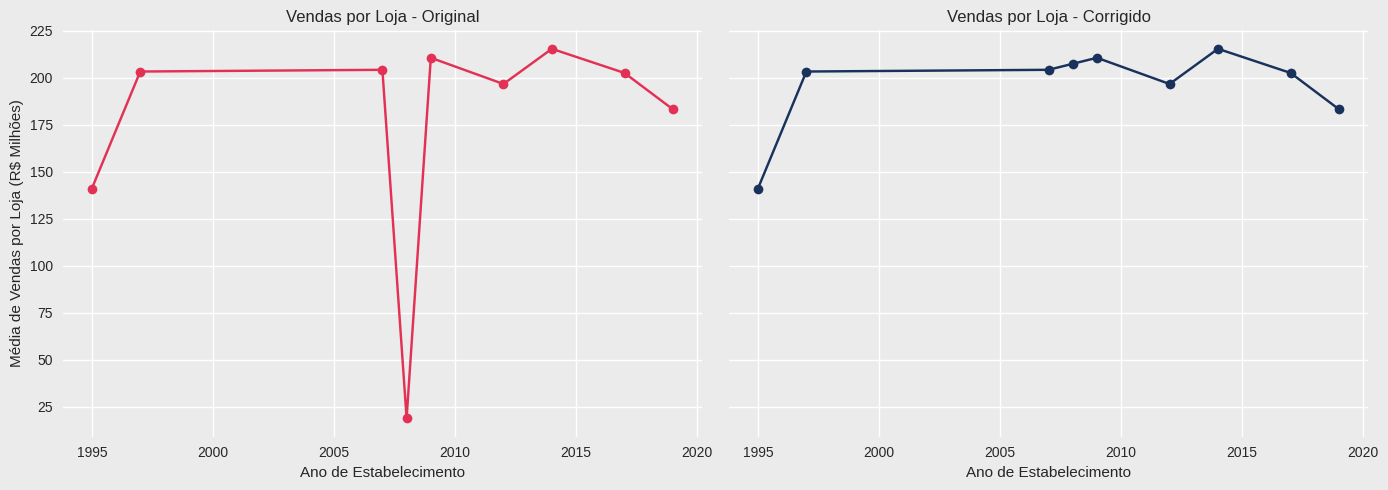

In [37]:
import matplotlib.pyplot as plt

# --- Dataset original agrupado ---
df_ano = (
    df_final.groupby("loja.loja_ano_estabelecimento")
    .agg(
        vendas_totais=("vendas_totais", "sum"),
        n_lojas=("loja_identificador", "nunique")
    )
)
df_ano["media_vendas_por_loja"] = df_ano["vendas_totais"] / df_ano["n_lojas"]

# --- Corrigir 2008 com interpolação ---
df_ano_corrigido = df_ano.copy()
df_ano_corrigido.loc[2008, "vendas_totais"] = (
    df_ano.loc[2007, "vendas_totais"] + df_ano.loc[2009, "vendas_totais"]
) / 2
df_ano_corrigido.loc[2008, "media_vendas_por_loja"] = (
    df_ano.loc[2007, "media_vendas_por_loja"] + df_ano.loc[2009, "media_vendas_por_loja"]
) / 2

# --- Plotagem ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Gráfico original
axes[0].plot(df_ano.index, df_ano["media_vendas_por_loja"]/1e6, marker="o", color="#e23155")
axes[0].set_title("Vendas por Loja - Original")
axes[0].set_xlabel("Ano de Estabelecimento")
axes[0].set_ylabel("Média de Vendas por Loja (R$ Milhões)")
axes[0].set_facecolor("#ebebeb")
fig.patch.set_facecolor("#ebebeb")

# Gráfico corrigido
axes[1].plot(df_ano_corrigido.index, df_ano_corrigido["media_vendas_por_loja"]/1e6, marker="o", color="#19325c")
axes[1].set_title("Vendas por Loja - Corrigido")
axes[1].set_xlabel("Ano de Estabelecimento")
axes[1].set_facecolor("#ebebeb")

plt.tight_layout()
plt.show()
